# Data Analyst Associate Case Study<a class="anchor" id="chapter0"></a>

### Company Background
PetMind is a nationwide pet product retailer in the United States. With inflation hitting 41-year
highs, the company is planning to reduce the cost of customer retention by improving brand
loyalty. The first strategy is to launch a monthly pet box subscription in three months.

## Table of Contents
* [Customer Questions](#chapter1)
* [Dataset](#chapter2)
* [Data Validation](#chapter3)
* [Data Discovery](#chapter4)
    * [Should the list only include the products being purchased more than once?](#section_4_1)
    * [How many products are purchased more than once?](#section_4_2)
    * [Do the projects being purchased again have better sales than others?](#section_4_3)
    * [What products are more likely to be purchased again for different types of Pets?](#section_4_4)
    * [Which Product Category had most Sales?](#section_4_5)
* [Findings](#chapter5)
* [Recommendation](#chapter6)

### Customer Question <a class="anchor" id="chapter1"></a>
The marketing team would like to answer the following questions to help with the decision:
- How many products are being purchased more than once?
- Do the products being purchased again have better sales than others?
- What products are more likely to be purchased again for different types of pets?
Added Questions for better Insights
- Which product category had most sales?
- Which product category had the best and worst average rating?

### Dataset <a class="anchor" id="chapter2"></a>
The dataset contains the sales records in the stores last year. The dataset can be
downloaded from <a href="https://s3.amazonaws.com/talent-assets.datacamp.com/pet_sales.csv">here</a>.

The dataset needs to be validated based on the description below:

| Column Name | Criteria |
| --- | --- |
| Product ID | Character, the unique identifier of the product. |
| Product Category | Character, the category of the product, one of 11 categories. |
| Sales | Numeric, the sales of the product in dollars last year. For example, “$120,000” should be converted into 120000. |
| Price | Numeric, the price of the product in dollars. |
| Vendor ID | Character, the unique identifier of the vendor for the product. |
| Pet Size | Character, the pet size category the product is designed for, one of 5 size categories. |
| Stretched | Gaussian |
| Pet Type | Character, the pet type the product is designed for, one of “cat” ,“dog”, “fish”, “bird”. Rows that indicate other pet types should not be included in the analysis. |
| Rating | Numeric, customer’s rating of the product (should be on a 10 point scale) |
| Rebuy | Binary, whether the product is purchased more than once or not (should be 1 or 0) |

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("pet_sales.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_id        879 non-null    int64  
 1   product_category  879 non-null    object 
 2   sales             879 non-null    object 
 3   price             879 non-null    float64
 4   vendor_id         879 non-null    object 
 5   pet_size          879 non-null    object 
 6   pet_type          879 non-null    object 
 7   rating            879 non-null    int64  
 8   re_buy            879 non-null    int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 61.9+ KB


## Data Validation <a class="anchor" id="chapter3"></a>
Describe the validation tasks you performed and what you found. Have you made any changes to the data to enable further analysis? Remember to describe what you did for every column in the data. 

After reading the CSV file, the first thing I do is to see the data type of each column with the DTYPES attribute. It shows that every column is an object, so I need to make some data conversions to match the criteria of the data dictionary. 
- I combine the Replace and astype function to convert both **Sales** from object to int replace the unwanted "$" and "," signs in-between the Sales column with "".
- After that, I do some transformations on the **pet_type(Pet Type)** column. The objective is to remove values other than Cat, Dog, Fish and bird. This requires singling out each required value and using the OR operator to remove other values which are not the 4 mentioned above.
- Adding to those two above, I convert the **product_id(Product ID)** column changing it from the int/numeric to a string/object.
- To make the column names match with the column names provided I will change the individual column names as given.

Note: I didn't change Rebuy because it says Binary as datatype (which is 0 and 1) meaning no need to change the column data type.
Finally, I check again that the data types are right.

In [2]:
df.head()

,product_id,product_category,sales,price,vendor_id,pet_size,pet_type,rating,re_buy
0,5040,Equipment,"$123,000",94.81,VC_1605,small,fish,7,1
1,4567,Toys,"$61,000",120.95,VC_1132,small,cat,10,0
2,4237,Toys,"$218,000",106.34,VC_802,small,hamster,6,0
3,4364,Snack,"$69,000",241.27,VC_929,large,dog,1,1
4,4184,Supplements,"$138,000",133.68,VC_749,large,dog,10,0


In [3]:
#For Task 1, ie Sales Column
df["sales"]=df["sales"].str.replace("$","").str.replace(",","").astype("int")

In [4]:
df.dtypes

product_id            int64
product_category     object
sales                 int64
price               float64
vendor_id            object
pet_size             object
pet_type             object
rating                int64
re_buy                int64
dtype: object

In [5]:
#For Task 2, ie Pet Type Columns
Cat = df["pet_type"] == "cat"
Dog = df["pet_type"] == "dog"
Fish = df["pet_type"] == "fish"
Bird = df["pet_type"] == "bird"

df = df[Cat | Dog | Fish | Bird]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 833 entries, 0 to 878
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_id        833 non-null    int64  
 1   product_category  833 non-null    object 
 2   sales             833 non-null    int64  
 3   price             833 non-null    float64
 4   vendor_id         833 non-null    object 
 5   pet_size          833 non-null    object 
 6   pet_type          833 non-null    object 
 7   rating            833 non-null    int64  
 8   re_buy            833 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 65.1+ KB


After filtering the dataframe to just Cat, Dog, Fish and Birds, the Number of rows dropped from 879 to 833, meaning the index column needs to be reset.

In [7]:
#Reset the Index Column to get th exact Index Numbers
df.reset_index(drop=True, inplace=True)

In [8]:
#Change Product ID from int to object to match the Criteria on the Dataset
df["product_id"] = df["product_id"].astype("object")

In [9]:
df.dtypes

product_id           object
product_category     object
sales                 int64
price               float64
vendor_id            object
pet_size             object
pet_type             object
rating                int64
re_buy                int64
dtype: object

In [10]:
#Finally, change the Column names for each column to suite the Data Table provided
df.columns = ["Product ID","Product Category", "Sales", "Price", "Vendor ID", "Pet Size", "Pet Type", "Rating", "Rebuy"]

In [11]:
#Describes the dataframe, including total number of rows, STD, Percentiles and Mean
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sales,833.0,116100.840336,66324.790235,3000.00,59000.0,116000.00,177000.00,230000.00
Price,833.0,127.994802,72.552580,0.35,63.3,129.52,189.25,252.69
Rating,833.0,6.530612,2.843572,1.00,5.0,6.00,10.00,10.00
Rebuy,833.0,0.468187,0.499287,0.00,0.0,0.00,1.00,1.00


In [12]:
df.head()

,Product ID,Product Category,Sales,Price,Vendor ID,Pet Size,Pet Type,Rating,Rebuy
0,5040,Equipment,123000,94.81,VC_1605,small,fish,7,1
1,4567,Toys,61000,120.95,VC_1132,small,cat,10,0
2,4364,Snack,69000,241.27,VC_929,large,dog,1,1
3,4184,Supplements,138000,133.68,VC_749,large,dog,10,0
4,4609,Bedding,183000,51.60,VC_1174,large,cat,10,0


## Data Discovery and Visualization <a class="anchor" id="chapter4"></a>
Describe what you found in the analysis and how the visualizations answer the customer questions in the project brief. In your description you should:
- Include at least two different data visualizations to demonstrate the characteristics of variables
- Include at least one data visualization to demonstrate the relationship between two or more variables
- Describe how your analysis has answered the business questions in the project brief

### Customer Questions <a class="anchor" id="chapter1"></a>
The marketing team would like to answer the following questions to help with the decision:
- Should the list only include the products being purchased more than once?
- How many products are being purchased more than once?
- Do the products being purchased again have better sales than others?
- What products are more likely to be purchased again for different types of pets?
- Which product category has most sales?

Firstly, to answer the question **should the list only include the products being purchased more than once(rebought)?**, I want to show the entire Pet Store data in a Matrix Table but instead of being sort by the Index, I will sort it using the Sales of different Products. The table shows that out of the top 5 products, 3 of them were not rebought meaning if Products not-rebought were filtered out, it would it show a wrong representation of Popular Products making the visualization analytically wrong, due to that all products should be considered.

On the second Question, I want to show the Percentage and Count of Total Products rebought as against the Total Number of Products, and this will be visualized using Pie Chart. After analysis, the data showed that 46.82%(390) were rebought against the 53.18%(443) which was not. Which goes to answer Customer Question 1 which asks **"How many products are being purchased more than once?"**.

Moving on, the next question asks **does the product being purchased again have more/better sales than others?**. Indicating this would be done using a Horizontal Bar where on the Y-Axis, it contains the Yes or No answer, and on the X-Axis the Total Sales for whether rebought or not. Note that, Yes indicates the Products rebought and vice-versa. After analysis, Rebought(ie Yes) sold about 47,776,000 which was less than those that were Not-Rebought(ie No) which sold about 54,271,000.

Third Question asks **What products are more likely to be purchased again for different types of pets?**, certain parameters needs to be checked which are;

1. Rebuy must be 1 (Product Must Be Rebought)
2. Rating needs to be above 9
3. Just one product needs to be selected from each Pet Type.

And due to this I have decided to group Pet Type and apply to a dataframe which will be filtered to just Rebuy being 1/True, and selecting the max product using the max operator.


**Which Product Category had most sales?**, this question can be answered by plotting Total Sales against Product Category on a Bar Chart. After analysis, just Equipment, Snacks, Medicine and Toys were above average and the remaining 7 below average. Housing and Grooming were the least among the 11 categories. Further analysis of data showed that there was little to no relationship between Sales and Ratings because products like Toys and Snacks being the least rated 6 at average while having 3rd(14.9 Million USD) and 2nd (15.1 Million USD) most sales respectively.


#### Should the list only include the products being purchased more than once?<a class="anchor" id="section_4_1"></a>

In [13]:
df.sort_values("Sales", ascending=False).head()

,Product ID,Product Category,Sales,Price,Vendor ID,Pet Size,Pet Type,Rating,Rebuy
64,4599,Housing,230000,75.45,VC_1164,large,cat,10,1
41,4648,Accessory,230000,19.36,VC_1213,medium,dog,10,0
358,4627,Food,230000,211.91,VC_1192,small,cat,10,0
414,4362,Accessory,229000,168.49,VC_927,small,dog,2,1
604,4340,Accessory,229000,18.51,VC_905,extra_small,dog,6,0


#### How many products are being purchased more than once? <a class="anchor" id="section_4_2"></a>

In [14]:
# Total Number of Products Rebought
Rebought = len(df[df["Rebuy"] == 1])
Rebought

390

In [15]:
# Total Number of Products
Total = len(df)
Total

833

In [16]:
#Percentage of Rebought Products to Total Number of Products
(Rebought/Total) * 100

# Over 46% of Products were rebought

46.818727490996395

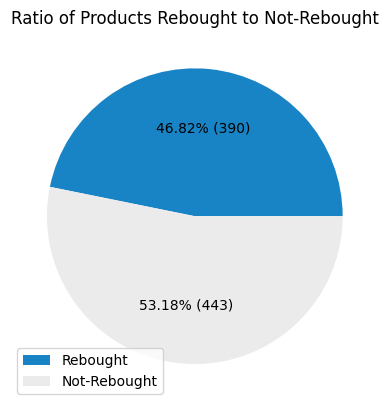

In [17]:
#Represent the Percentage of Rebought Products to Total Number of Products
NotRebought = Total-Rebought
colors = ["#1984c5","#EBEBEB"]
plt.pie([Rebought, NotRebought],autopct=lambda p: '{:.2f}% ({:.0f})'.format(p,p/100*(Rebought+(NotRebought))),
        colors = colors)
plt.title("Ratio of Products Rebought to Not-Rebought")
plt.legend(["Rebought", "Not-Rebought"], loc=3)
plt.show()

#### Do the products being purchased again have better sales than others?<a class="anchor" id="section_4_3"></a>

In [18]:
#Sum of sales being repurchased
Repurchased_Sales = df[df["Rebuy"] == 1]["Sales"].sum()
Repurchased_Sales

45587000

In [19]:
#Sum of Products Not Repurchased
Not_Repurchased_Sales = df[df["Rebuy"] == 0]["Sales"].sum()
Not_Repurchased_Sales

51125000

In [20]:
#Total Sales to whether Product was rebought or not
plotx = df["Sales"].groupby(df["Rebuy"]).sum().sort_values()
plotx.index = ["Yes", "No"]
plotx

Yes    45587000
No     51125000
Name: Sales, dtype: int64

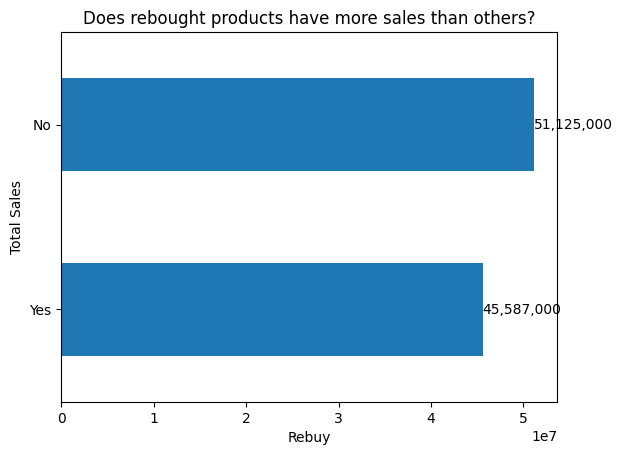

In [21]:
#Representation of Total Sales against Rebuy
plotx = plotx.plot(kind="barh", title="Does rebought products have more sales than others?", animated = True)
plt.ylabel("Total Sales")
plt.xlabel("Rebuy")
container = plotx.containers[0]
plotx.bar_label(container, labels=[f'{x:,.0f}' for x in container.datavalues])

plt.show()

#### What products are more likely to be purchased again for different types of pets?<a class="anchor" id="section_4_4"></a>

In [22]:
#Filter products to just 1(ie Rebought Products) and group by Pet Type selecting only product with most sales
df[df["Rebuy"] == 1].groupby(df["Pet Type"]).max()

,Product ID,Product Category,Sales,Price,Vendor ID,Pet Size,Pet Type,Rating,Rebuy
Pet Type,,,,,,,,,
bird,5049,Toys,221000,246.68,VC_867,small,bird,9,1
cat,4865,Toys,230000,251.74,VC_996,small,cat,10,1
dog,4866,Toys,229000,249.70,VC_999,small,dog,10,1
fish,5050,Toys,226000,248.59,VC_836,small,fish,10,1


#### Which product category has most sales?<a class="anchor" id="section_4_5"></a>

In [23]:
# Product Category against Sales

PS = df["Sales"].groupby(df["Product Category"]).sum().sort_values()
PS

Product Category
Housing         4498000
Grooming        5131000
Bedding         5236000
Clothes         5362000
Accessory       5791000
Food            7449000
Supplements     7966000
Medicine        8814000
Toys           14153000
Snack          15965000
Equipment      16347000
Name: Sales, dtype: int64

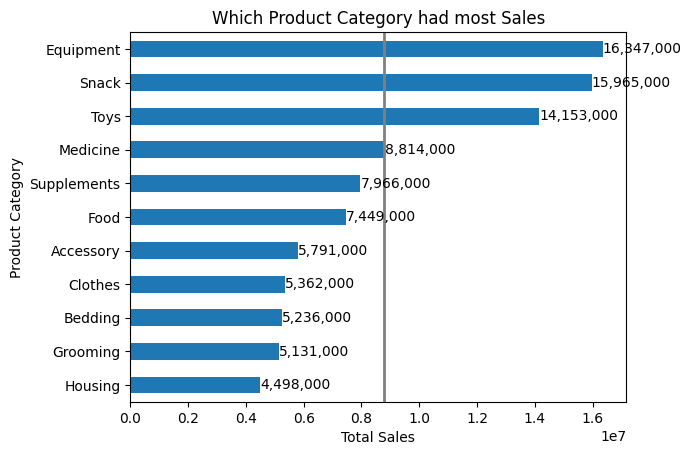

In [24]:
PCS = PS.plot(kind = "barh")
plt.title("Which Product Category had most Sales")
plt.ylabel("Product Category")
plt.axvline(PS.mean(), color='grey', linewidth=2)
plt.xlabel("Total Sales")
container = PCS.containers[0]
PCS.bar_label(container, labels=[f'{x:,.0f}' for x in container.datavalues])
plt.show()

##### Is there a relationship between Low Sales and Ratings (ie Does Low Ratings affect Low Sales?)

In [25]:
Rating = df["Rating"].groupby(df["Product Category"]).mean().sort_values()
Rating

Product Category
Snack          5.816176
Toys           5.832117
Equipment      5.912409
Grooming       6.292683
Accessory      6.619048
Bedding        6.785714
Housing        7.000000
Medicine       7.125000
Clothes        7.309524
Food           7.704225
Supplements    7.859155
Name: Rating, dtype: float64

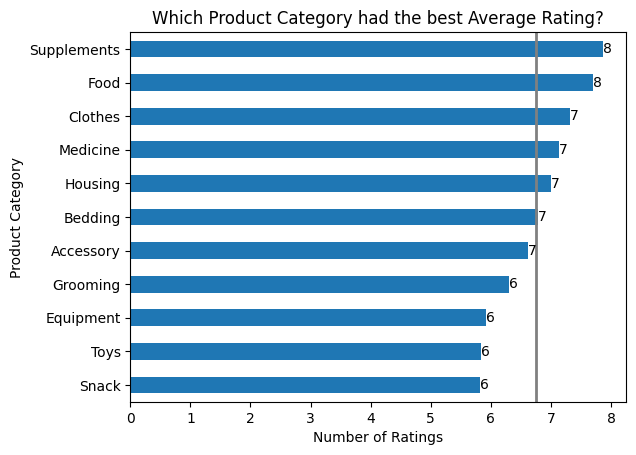

In [26]:
R = Rating.plot(kind="barh")
plt.xlabel("Number of Ratings")
plt.title("Which Product Category had the best Average Rating?")
plt.axvline(Rating.mean(), color='grey', linewidth=2)
container = R.containers[0]
R.bar_label(container, labels=[f'{x:,.0f}' for x in container.datavalues])
plt.show()

##### Which Product Category had the most Sales By Rebuy?

In [27]:
Sales_Rebuy = pd.pivot_table(df,index=["Product Category"], values="Sales", columns="Rebuy", aggfunc=np.sum, sort=True)

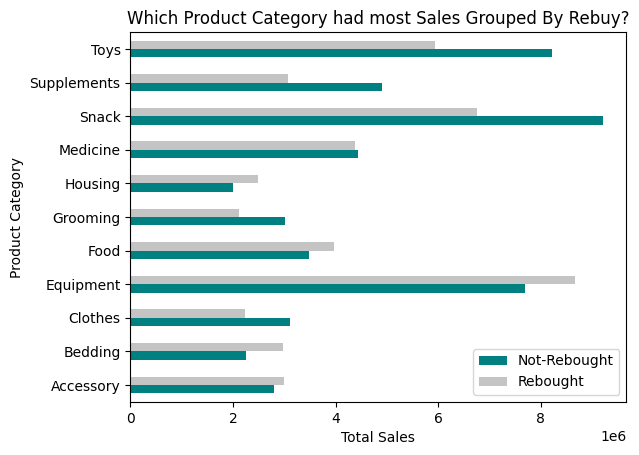

In [28]:
SR = Sales_Rebuy.plot(kind = "barh", color=["#008080","#c4c4c4"])
plt.title("Which Product Category had most Sales Grouped By Rebuy?")
plt.ylabel("Product Category")
plt.xlabel("Total Sales")
plt.legend(labels=["Not-Rebought","Rebought"])
plt.show()

#### Which Product Sold Best?

In [29]:
#What were the Best Selling Products?
df.sort_values(by="Sales", ascending=False).head()

,Product ID,Product Category,Sales,Price,Vendor ID,Pet Size,Pet Type,Rating,Rebuy
64,4599,Housing,230000,75.45,VC_1164,large,cat,10,1
41,4648,Accessory,230000,19.36,VC_1213,medium,dog,10,0
358,4627,Food,230000,211.91,VC_1192,small,cat,10,0
414,4362,Accessory,229000,168.49,VC_927,small,dog,2,1
604,4340,Accessory,229000,18.51,VC_905,extra_small,dog,6,0


#### What are the Costliest Products?

In [30]:
#What were the Costliest Products?
df.sort_values(by="Price", ascending=False).head()

,Product ID,Product Category,Sales,Price,Vendor ID,Pet Size,Pet Type,Rating,Rebuy
420,4630,Clothes,92000,252.69,VC_1195,extra_small,dog,10,0
525,4883,Toys,167000,252.55,VC_1448,medium,cat,6,0
409,4610,Housing,119000,252.32,VC_1175,extra_small,dog,10,0
101,4685,Supplements,73000,251.74,VC_1250,extra_small,cat,10,1
419,4729,Medicine,123000,251.73,VC_1294,medium,cat,10,0


### Findings <a class="anchor" id="chapter5"></a>

1) 58.13% (443 out of 833) of the Total Products were not repurchased, this was close to 51.1 million USD.

2) Toys products were the most likely to be purchased Product Category, it has the most Sales in all 4 Pet Types as well as it being the 3rd Highest Product Category with most Sales.

3) Equipments, Snacks and Toys made the had the highest Sales among the 11 product categories, while ont the other end Housing, Grooming and Bedding had the least.

4) With Rebuy as context, those Three mentioned in 3rd Findings still found a way to Top Sales in both Not-Rebought and Rebought. Snack, Toys and Equipments was the Order for Not-Rebought Products Respectively, while Equipment, Snack and Toys were Top 3 for Rebought Products.

5) The Top Selling Product is Product 4599, The costliest Product was Product 4630 and lastly Biggest Vendor is VC-1163.

### Recommendations <a class="anchor" id="chapter6"></a>

- Since over 51.1 million US Dollars was generated from Products that were not rebought, removing those top performing products from the best-seller would create a wrong visualization.
- A survey needs to be ran on both Equipments, Snacks and Toys customers to help understand the low Average in these 3 mentioned Categories.
- To improve Rebuy rate from the mere 46.82% we need to provide incentives or discounts who rebuy products to help improve not only Sales Revenue but as well as Increase the Rebuy Rate.

[Back To Top](#chapter0)

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your case study